In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import read_save as r_s
# from read_save import LMBD_Image

os.chdir(os.path.normpath('d:\\Estudi\\Uni\\Actual\\TFG\\Github'))
folder_path = "data/lmdb/"

# 1. Carregar dades: 

Es començarà amb dades numèriques (carregarè lables de 0 a 9).

In [2]:
raw_images, labels = r_s.read_folder_lmdb(folder_path, iterator = range(30, 40))

# 2. Randomize i split en train-test

80% training sembla raonable. Com que tenim tantes dades, podria ser bona idea tenir 70% entrenament, 10% test i 20% validació, per a poder jugar amb llibertat amb els hiperparàmetres.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(raw_images, labels, test_size = 0.2, random_state = 123)

# 3. Visualització

In [100]:
print(raw_images.shape)
pd.crosstab(labels, columns = "counts")/len(labels) * 100

(344307, 128, 128)


col_0,counts
row_0,
0,10.108130
1,11.050894
2,9.928349
3,10.250445
4,9.709939
5,9.023052
6,9.897853
7,10.396536
8,9.841217


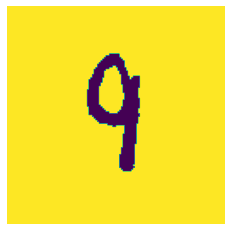

'9'

In [101]:
plt.imshow(X_train[0])
plt.axis("off")
plt.show()
y_train[0]

# 4. Testejan Reducció de Dimensions, PCA

Com que tenim 128 * 128 variables, i es nota que les imatges tenen molts pixels blancs, reduir la dimenció hauria de ser molt útil si volem aplicar altres models fora de xarxes neuronals, tals com SVM, entre d'altres algoritmes i no sufrir de problemes de dimensionalitat.

El problema és que aplicar PCA directament utilitza totes les dades, i això són molts GB de memòria ram (36GB). Potser probar d'utlitzar incremental PCA.

De moment ho he probat amb una submostra de 10000 individus.



In [5]:
from sklearn.decomposition import PCA
sample = 10000

pca = PCA(n_components = 1000)
pca.fit(X_train[0:sample].reshape(sample, 128*128))

PCA(n_components=1000)

In [11]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

925

Es pot conservar un 95% de la variancia, amb una submostra de 925 variables, de les 16384 que teniem. És una reducció important.